In [ ]:
from google.colab import drive
drive.mount('/content/ggdrive')

Mounted at /content/ggdrive


In [ ]:
import pandas as pd
df = pd.read_csv('/content/ggdrive/MyDrive/Mô hình dự đoán/data2.csv')
df

,STT,SoTienDKVayBanDau,LoanDuration,SoTienConLai,TienGiaiNgan,Số điện thoại khách hàng,Salary,TS_CREDIT_SCORE_V2,CardNumber,Brieft,...,ReceiveYourIncomeSalary,ToDate,Thời gian đã sống,Trạng thái,WardName,CityName,CreditInfo,Address,Hình thức cư trú,Street
0,6,10000000,119,0,10000000,966710180,12000000,675,1182005991,0,...,Chuyển khoản ngân hàng,2016-12-02 00:00:00,Hơn 10 năm,Kết thúc,NaN,Hà Nội,"Khách hàng hiện không có quan hệ tại TCTD, khô...","'-, TT CỤC KHÍ TƯỢNG THỦY VĂN, TRUNG LIỆT, Q.Đ...",Đồng sở hữu,"Ngõ 95 Chùa Bộc, tập thể cục Khí tượng Thủy văn"
1,7,10000000,29,0,10000000,966710180,12000000,675,1182005991,0,...,Chuyển khoản ngân hàng,2016-07-28 00:00:00,Hơn 10 năm,Kết thúc,NaN,Hà Nội,"Khách hàng hiện không có quan hệ tại TCTD, khô...","'-, TT CỤC KHÍ TƯỢNG THỦY VĂN, TRUNG LIỆT, Q.Đ...",Đồng sở hữu,"Ngõ 95 Chùa Bộc, tập thể cục Khí tượng Thủy văn"
2,8,7000000,239,0,7000000,963609962,8000000,582,1188000582,0,...,Tiền mặt có phiếu lương,2017-03-03 00:00:00,Hơn 10 năm,Kết thúc,NaN,Hà Nội,"Khách hàng hiện không có quan hệ tại TCTD, khô...",227 NGO CHO KHAM THIEN DONG DA HA NOI VN,Thuộc sở hữu của họ hàng,ngõ chợ Khâm Thiên
3,9,4000000,89,0,4000000,967387461,8000000,522,1091006557,2,...,Chuyển khoản ngân hàng,2018-08-28 00:00:00,1 - 3 năm,Kết thúc,NaN,Hà Nội,"Khách hàng hiện đang quan hệ tại 2 TCTD, không...","SO 1, DAY 8 PHUC LA, HA DONG, HA NOI VN",Thuộc sở hữu của họ hàng,tòa CT1 - tầng 21 Căn hộ 21K1 chung cư viện bỏ...
4,10,10000000,224,10000000,10000000,967387461,8000000,483,1091006557,2,...,Chuyển khoản ngân hàng,2019-03-13 00:00:00,1 - 3 năm,Đang Vay,Tân Triều,Hà Nội,"Khách hàng hiện đang quan hệ tại 2 TCTD, không...","SO 1, DAY 8 PHUC LA, HA DONG, HA NOI VN",Thuộc sở hữu của họ hàng,tòa CT1 - tầng 21 Căn hộ 21K1 chung cư viện bỏ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2232,3180,15000000,364,14254750,15000000,972992164,6800000,549,70870234,0,...,Chuyển khoản ngân hàng,2019-12-23 00:00:00,1 - 3 năm,Đang Vay,Bồ Đề,Hà Nội,"Khách hàng hiện không có quan hệ tại TCTD, khô...","., THÔN PHÚC VƯỢNG, X. PHÚC ỨNG, H. SƠN DƯƠNG,...",Thuê,"Số 2 Ngõ 266 Nguyễn Văn Cừ, Bồ Đề, Long Biên, ..."
2233,3181,5000000,89,3474831,5000000,353833091,7500000,577,331764079,2,...,Chuyển khoản ngân hàng,2019-03-23 00:00:00,1 - 3 năm,Đang Vay,Bình Thuận,Hồ Chí Minh,"Khách hàng hiện đang quan hệ tại 2 TCTD, không...","40/8B,,TRẦN XUÂN SOẠN,TÂN THUẬN TÂY,QUẬN 7,TP ...",Thuê,Số 350/26 Huỳnh Tấn Phát-Phường Bình Thuận-Quậ...
2234,3184,6000000,89,0,6000000,385669091,8000000,605,35091001441,1,...,Tiền mặt từ khách hàng,2019-03-26 00:00:00,1 - 3 năm,Kết thúc,Quỳnh Lôi,Hà Nội,"Khách hàng hiện đang quan hệ tại 1 TCTD, không...","THANH NGHI, THANH XUAN, HA NOI",Nhà sở hữu,"Số Nhà 3A, Ngõ A1, Phố 8/3, P.Quỳnh Lôi, Q.Hai..."
2235,3187,7000000,89,0,6000000,869625266,12000000,597,151505959,2,...,Tiền mặt từ khách hàng,2019-04-09 00:00:00,1 - 3 năm,Kết thúc,Thanh Liệt,Hà Nội,"Khách hàng hiện đang quan hệ tại 2 TCTD, không...",THÔN LUẬT NGOẠI 2 - XÃ QUANG LỊCH,Thuê,Số 27 Ngõ 806 Đường Kim Giang - Xã Thanh Liệt ...


Lựa chọn mô hình: Mô hình dự đoán nợ xấu và trễ hạn thanh toán:


Accuracy: 0.9152
              precision    recall  f1-score   support

           0       1.00      0.90      0.95       399
           1       0.56      1.00      0.72        49

    accuracy                           0.92       448
   macro avg       0.78      0.95      0.84       448
weighted avg       0.95      0.92      0.92       448

AUC Score: 0.9519


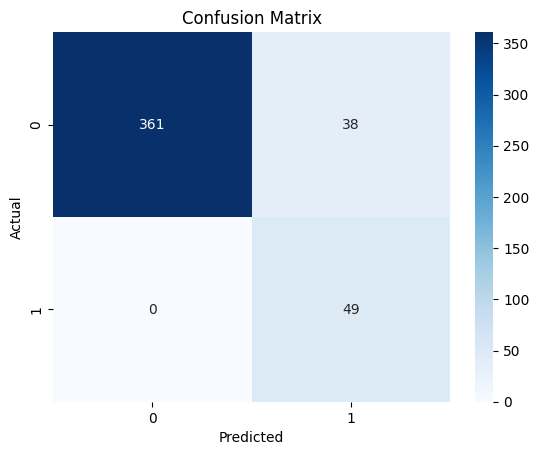

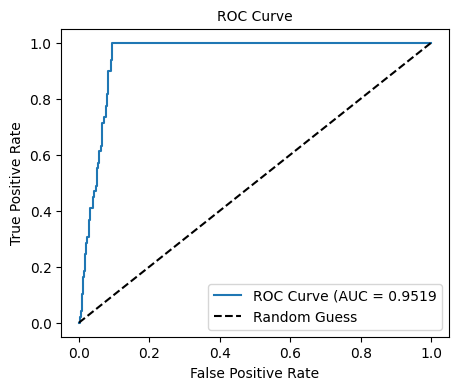

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, classification_report, roc_curve
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt

# Chọn các thuộc tính (features) và biến mục tiêu (target)
features = df[['TS_CREDIT_SCORE_V2', 'SoTienDKVayBanDau', 'Salary', 'SoTienConLai', 'LongestOverdue', 'JobName', 'NumberOfLoans', 'LoanDuration']]
target = df['HasBadDebt']

# Mã hóa biến phân loại
features = pd.get_dummies(features, columns=['JobName'], drop_first=True).astype(float)

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.2, random_state=42, stratify=target)

# Giải quyết mất cân bằng dữ liệu với SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Khởi tạo và huấn luyện mô hình Logistic Regression với class_weight balanced
model = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
model.fit(X_train_resampled, y_train_resampled)

# Dự đoán trên tập kiểm tra
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Đánh giá mô hình
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print(classification_report(y_test, y_pred, zero_division=1))
auc_score = roc_auc_score(y_test, y_pred_proba)
print(f"AUC Score: {auc_score:.4f}")

# Vẽ ma trận nhầm lẫn
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(5,4))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.4f}')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve', fontsize = 10)
plt.legend()
plt.show()


Accuracy: 0.7634
              precision    recall  f1-score   support

           0       0.94      0.78      0.85       384
           1       0.34      0.69      0.45        64

    accuracy                           0.76       448
   macro avg       0.64      0.73      0.65       448
weighted avg       0.85      0.76      0.79       448

AUC Score: 0.8063


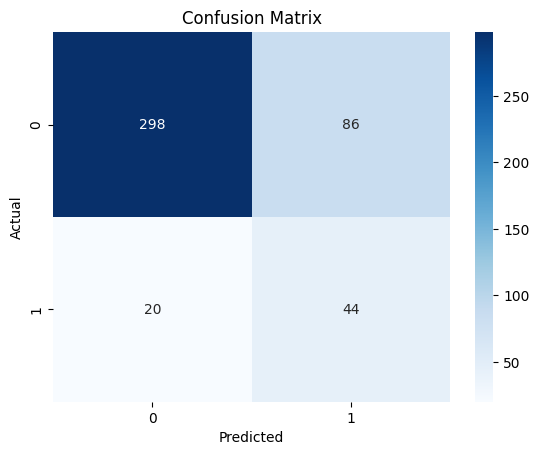

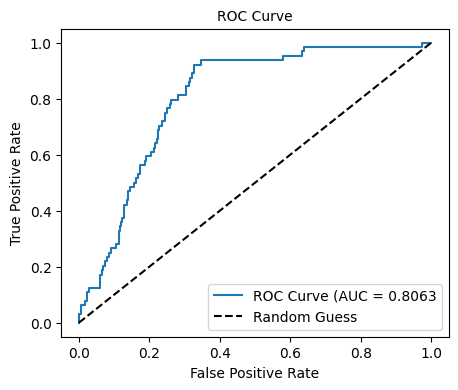

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, classification_report, roc_curve
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt

# Chọn các thuộc tính (features) và biến mục tiêu (target)
features = df[['TS_CREDIT_SCORE_V2', 'SoTienDKVayBanDau', 'Salary', 'SoTienConLai', 'LongestOverdue', 'JobName', 'NumberOfLoans', 'LoanDuration']]
target = df['HasLatePayment']

# Mã hóa biến phân loại
features = pd.get_dummies(features, columns=['JobName'], drop_first=True).astype(float)

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.2, random_state=42, stratify=target)

# Giải quyết mất cân bằng dữ liệu với SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Khởi tạo và huấn luyện mô hình Logistic Regression với class_weight balanced
model = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
model.fit(X_train_resampled, y_train_resampled)

# Dự đoán trên tập kiểm tra
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Đánh giá mô hình
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print(classification_report(y_test, y_pred, zero_division=1))
auc_score = roc_auc_score(y_test, y_pred_proba)
print(f"AUC Score: {auc_score:.4f}")

# Vẽ ma trận nhầm lẫn
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(5,4))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.4f}')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve', fontsize = 10)
plt.legend()
plt.show()
